In [1]:
#Importing required libaries for code to run

%matplotlib notebook

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import fiona
import os
from shapely.geometry import Point, LineString, Polygon


plt.ion() # makes the plotting of the map interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

    
#Create variable for open spaces dataset and load data

openspace_data = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\NS_GreenspaceSite.shp')

#Create variable for boundary dataset and load data, this example uses Glasgow as an area of interest

boundary_data = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\GlasgowBoundary.shp')

#Create variable for roads dataset and load data

road_data = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\NS_RoadLink.shp')

#Create Variable for glasgow postcode data 

postcode_g = gpd.read_file (r'C:\Users\angel\Programming\Project\Data\g_postcode_data.shp')


In [2]:
#display open space dataset table

openspace_data

,id,function,distName1,distName2,distName3,distName4,geometry
0,B9FB5BAD-D06B-5E80-E053-A03BA40A915F,Religious Grounds,Cumlodden Parish Church,None,None,None,"POLYGON Z ((201510.100 699637.390 0.000, 20146..."
1,B9FB5BAD-D08B-5E80-E053-A03BA40A915F,Playing Field,None,None,None,None,"POLYGON Z ((202285.600 699980.300 0.000, 20237..."
2,B9FB5B8A-4527-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((295757.140 697393.170 0.000, 29577..."
3,B9FB5B8A-453B-5E80-E053-A03BA40A915F,Playing Field,None,None,None,None,"POLYGON Z ((296531.130 697756.960 0.000, 29653..."
4,B9FB5B55-D330-5E80-E053-A03BA40A915F,Cemetery,None,None,None,None,"POLYGON Z ((296740.640 697734.620 0.000, 29672..."
...,...,...,...,...,...,...,...
6513,B9FB5B7C-44F7-5E80-E053-A03BA40A915F,Bowling Green,None,None,None,None,"POLYGON Z ((297947.770 631156.450 0.000, 29797..."
6514,B9FB5B7C-7D9F-5E80-E053-A03BA40A915F,Cemetery,None,None,None,None,"POLYGON Z ((285450.820 605668.780 0.000, 28545..."
6515,B9FB5B7C-8031-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((288403.480 604139.460 0.000, 28841..."
6516,B9FB5B7C-8073-5E80-E053-A03BA40A915F,Cemetery,None,None,None,None,"POLYGON Z ((289341.340 603559.180 0.000, 28934..."


In [3]:
#Display Boundary dataset table

boundary_data

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,None,NCP,Non-Civil Parish or Community,GLASGOW_CITY,9114.0,9114.0,0.0,0.0,None,17635.598,173.468,FA,FILLER AREA,None,None,"POLYGON ((251394.803 672325.598, 251426.299 67..."


In [4]:
#Display road dataset table 

road_data

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry
0,false,06A19770-70B6-4D3D-938C-C6085728F028,Unclassified,None,Riccarton Road,None,None,None,Single Carriageway,45,false,false,false,A4693352-CD11-42D3-B1BC-EDBE47BFCC12,137D16B4-CE3A-4DBC-87E3-EE0B18D35551,None,osgb4000000006296591,None,Local Road,"LINESTRING Z (299998.000 676234.000 0.000, 299..."
1,false,F882F983-E302-4F93-83E5-E80C3B3E64A3,Unclassified,None,Riccarton Road,None,None,None,Single Carriageway,245,false,false,false,D82F5C76-F78A-4821-AE72-75BE8B55FF75,A4693352-CD11-42D3-B1BC-EDBE47BFCC12,None,osgb4000000006296591,None,Local Road,"LINESTRING Z (300043.000 676285.000 0.000, 300..."
2,false,5D9E78E8-CF94-4487-897A-125E80083410,Unclassified,None,Priory Road,None,None,None,Single Carriageway,40,false,false,false,6866CFFA-B9E7-4F06-9A53-6F4293B5779D,B7642B8B-1B59-44D9-A2FE-6ADFE3E8D79D,None,osgb4000000006299257,None,Local Road,"LINESTRING Z (299994.000 676536.000 0.000, 300..."
3,false,63A37C06-653E-416A-9B7D-60AD26141801,Unclassified,None,None,None,None,None,Single Carriageway,65,false,false,false,69039E82-2C4A-4102-AF23-D35C03A6CF7B,D74DF285-064F-4D98-AB93-8CB39CCAAB32,None,None,None,Local Road,"LINESTRING Z (299985.040 676555.080 0.000, 300..."
4,false,747DF7BC-150C-4AAE-B408-132EBA7CA067,Unclassified,None,Burgess Hill,None,None,None,Single Carriageway,135,false,false,false,F002EB34-73CF-4FFB-88C2-C4321B3AF97F,9A9ED85E-68E5-4C2E-855A-731AB34FA23A,None,osgb4000000006303062,None,Local Road,"LINESTRING Z (299976.160 676643.720 0.000, 300..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152540,false,25B8E38D-04E2-49EE-959F-409AECD82DB0,Not Classified,None,None,None,None,None,Single Carriageway,40,false,false,false,E5BB11CB-9A88-4FD9-8487-39132547E903,AA897CB2-71A9-405B-88FF-721B6F633AC4,None,None,None,Restricted Local Access Road,"LINESTRING Z (200756.570 635276.790 0.000, 200..."
152541,false,31E1ABA4-7D87-4E64-99E6-DE2917EA59DC,Unknown,None,None,None,None,None,Single Carriageway,70,false,false,false,CDCC319B-BAE4-4315-8D19-54B68E006212,611E0D98-FC98-41A6-8094-175FF3945AC2,None,None,None,Restricted Local Access Road,"LINESTRING Z (200782.630 635400.440 0.000, 200..."
152542,false,A26FC743-9B1C-40A1-AB85-FE51E48AD5D7,Unknown,None,None,None,None,None,Single Carriageway,107,false,false,false,5A581E30-7834-4C74-9B5B-E5D23D948F37,CDCC319B-BAE4-4315-8D19-54B68E006212,None,None,None,Restricted Local Access Road,"LINESTRING Z (200888.410 635418.760 0.000, 200..."
152543,false,83202DD7-9C66-4F0E-A47A-1A67CF899DED,Not Classified,None,None,None,None,None,Single Carriageway,52,false,false,false,AA897CB2-71A9-405B-88FF-721B6F633AC4,611E0D98-FC98-41A6-8094-175FF3945AC2,None,None,None,Local Road,"LINESTRING Z (200787.900 635301.770 0.000, 200..."


In [5]:
#display postcode dataset table

postcode_g

,Field1,Field2,Field3,Field4,Field5,Field6,Field7,Field8,Field9,Field10,geometry
0,G1 1AB,10,259624,665340,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259624.000 665340.000)
1,G1 1AD,10,259185,665164,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259185.000 665164.000)
2,G1 1BL,10,259696,665068,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259696.000 665068.000)
3,G1 1BQ,10,259321,665167,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259321.000 665167.000)
4,G1 1DA,10,259213,665244,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259213.000 665244.000)
...,...,...,...,...,...,...,...,...,...,...,...
31896,G90 8BR,10,259811,666213,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259811.000 666213.000)
31897,G90 8BS,10,259811,666213,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259811.000 666213.000)
31898,G90 8BT,10,259702,666223,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259702.000 666223.000)
31899,G90 8BU,10,259702,666223,S92000003,None,S08000031,None,S12000049,S13002976,POINT (259702.000 666223.000)


In [6]:
# Check co-ordinate reference systems for openspace layers

openspace_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [7]:
# Check co-ordinate reference systems for boundary layer

boundary_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [8]:
# Check co-ordinate reference systems for roads layer

road_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [9]:
#check co-ordinate reference systsem for postcode layer 

postcode_g.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [10]:
#Clip the open space dataset to the extent of the project boundary layer, using geopandas clip function 

# Clip data
openspace_glasgow = gpd.clip(openspace_data, boundary_data)

# Ignore missing/empty geometries
openspace_glasgow = openspace_glasgow[~openspace_glasgow.is_empty]

#Print number of rows in new clipped dataset compared to original dataset. Ensures that clip has worked.
print("The clipped data has fewer polygons (represented by rows):",
      openspace_glasgow.shape, openspace_data.shape)

#export clipped open space dataset into ESRI shapefile into data folder

openspace_glasgow.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\openspace_glasgow.shp', driver = 'ESRI Shapefile')


The clipped data has fewer polygons (represented by rows): (1079, 7) (6518, 7)


In [11]:
#Clip the roads dataset to the extent of the project boundary layer, using geopandas clip function 

# Clip data
road_glasgow = gpd.clip(road_data, boundary_data)

# Ignore missing/empty geometries
road_glasgow = road_glasgow[~road_glasgow.is_empty]

#Print number of rows in new clipped dataset compared to original dataset. Ensures that clip has worked.
print("The clipped data has fewer line sections (represented by rows):",
      road_glasgow.shape, road_data.shape)

#export clipped road dataset into ESRI Shapefile into data folder

road_glasgow.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\road_glasgow.shp', driver = 'ESRI Shapefile')


The clipped data has fewer line sections (represented by rows): (23788, 20) (152545, 20)


In [12]:
# identify the number of open space functions in the dataset to identify how many colours are required for symboloisation 
num_openspace = len(openspace_glasgow.function.unique())
print('Number of unique Open Space Types: {}'.format(num_openspace))
print(openspace_glasgow['function'].unique())

Number of unique Open Space Types: 10
['Public Park Or Garden' 'Play Space' 'Religious Grounds'
 'Other Sports Facility' 'Playing Field' 'Bowling Green' 'Tennis Court'
 'Golf Course' 'Allotments Or Community Growing Spaces' 'Cemetery']


In [13]:
# Identify the number of unique road types in the roads datasetto identify how many colours are required for symboloisation 
num_road = len(road_glasgow.function.unique())
print('Number of unique road classes: {}'.format(num_road)) 

Number of unique road classes: 8


<IPython.core.display.Javascript object>


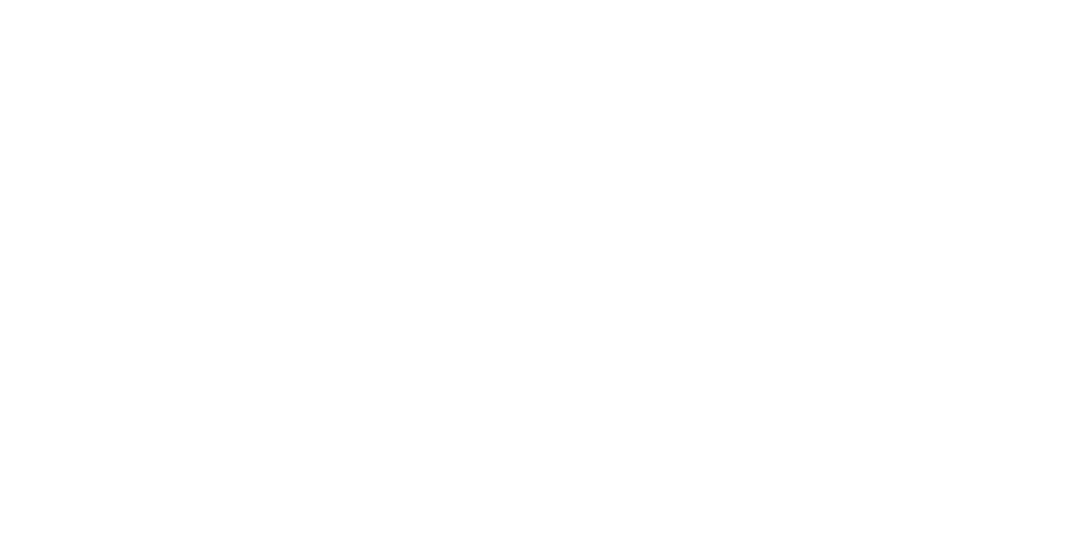

In [14]:
myFig = plt.figure(figsize=(16, 8))  # create a figure of size 10x10 (representing the page size in inches)

myCRS = ccrs.UTM(30)  # create a Universal Transverse Mercator reference system to transform our data.
# be sure to fill in XX above with the correct number for the area we're working in.

ax = plt.axes(projection=ccrs.Mercator())  # finally, create an axes object in the figure, using a Mercator
# projection, where we can actually plot our data.

<IPython.core.display.Javascript object>


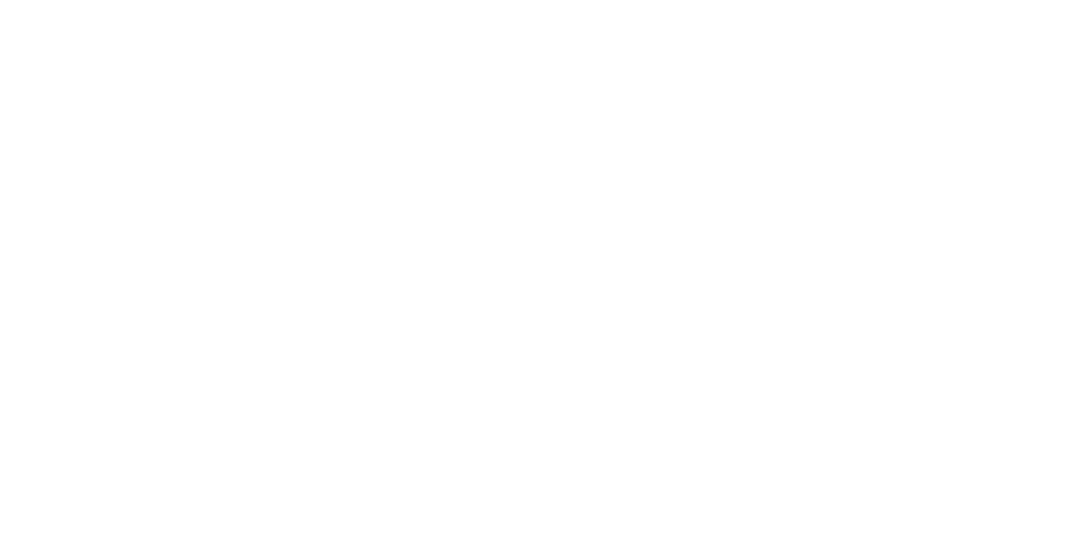

In [15]:
# first, we just add the outline of glasgow city council using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(boundary_data['geometry'], myCRS, edgecolor='yellow', facecolor='w')
xmin, ymin, xmax, ymax = boundary_data.total_bounds
ax.add_feature(outline_feature) # add the features we've created to the map.

# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS) # because total_bounds gives output as xmin, ymin, xmax, ymax,

#add gridlines to the map, turning off the top and rightside labels 
gridlines = ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')
gridlines.right_labels =False # turn off the right side labels
gridlines.top_labels =False # turn off the top labels

myFig # re-display the figure here.

In [16]:
#add title to map figure
plt.title('Glasgow Open Spaces')

Text(0.5, 1.0, 'Glasgow Open Spaces')

In [17]:
#create colours for the open space types - for this dataset 10 colours need to be identified

openspace_colors = ['lightgreen','palevioletred', 'crimson', 'dimgrey', 'lime', 'darkorchid', 'darkorange', 'hotpink', 'indigo', 'aqua'  ]

# get a list of unique names for the Open Space type
openspace_types = list(openspace_glasgow.function.unique())

# sort the open space types alphabetically by name
openspace_types.sort() 

# add the open spaces data to the map

for i, openspace in enumerate(openspace_types):
    feat = ShapelyFeature(openspace_glasgow['geometry'][openspace_glasgow['function'] == openspace], myCRS, 
                        edgecolor='black',
                        facecolor=openspace_colors[i],
                        linewidth=1,
                        alpha=0.25)
    ax.add_feature(feat)


In [18]:
#add roads layer to map 
road_colors = ['darkslategrey', 'navy', 'silver', 'darkmagenta', 'sienna', 'darkred', 'darkgoldenrod', 'olive']

# get a list of unique road types from the function attribute for the roads dataset
road_types = list(road_glasgow.function.unique())

# sort the open space types alphabetically by name
road_types.sort() 

# add the road data to the map
for i, road in enumerate(road_types):
    road_feat = ShapelyFeature(road_glasgow['geometry'][road_glasgow['function'] == road], myCRS, 
                                edgecolor='black',
                                facecolor=road_colors[i],
                                linewidth=0.25)
    ax.add_feature(road_feat)
    

<IPython.core.display.Javascript object>


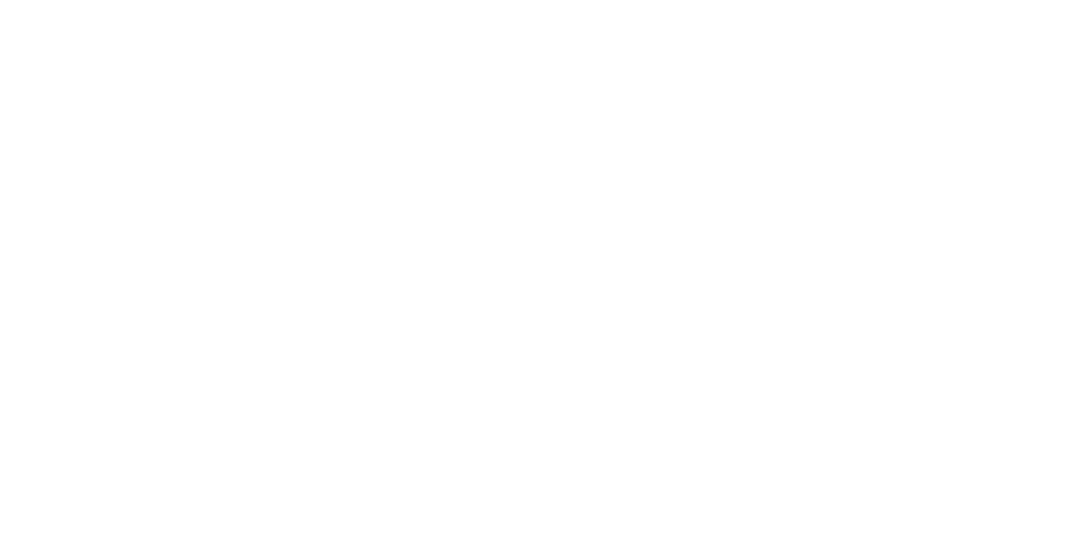

In [19]:
# generate a list of handles for the openspace dataset
openspace_handles = generate_handles(openspace_types, openspace_colors, alpha=0.25)

#  generate a list of handles for the road dataset
road_handles = generate_handles(road_types, road_colors, alpha=0.25)

#generate handle for boundary data
#boundary_handle = [mpatches.Patch([], [], edgecolor='yellow')]

#ax.legend() takes a list of handles and a list of labels corresponding to the objects you want to add to the legend
handles = openspace_handles + road_handles #+ boundary_handle
                                
labels = openspace_types + road_types #+ 'Glasgow Boundary'

leg = ax.legend(handles, labels, title='Legend', title_fontsize=12, 
               fontsize=10, loc='upper right',bbox_to_anchor=(1.5, 1), frameon=True, framealpha=1)


myFig #show the updated figure


In [20]:
#save the map as a png file
myFig.savefig('Glasgow_OpenSpace_Map.png', dpi=300)

In [21]:
##Now we can see the map of the relevent openspace and road data within the Glasgow City Council Area, analysis can be carried out to interegate the data and find out more about the openspaces and roads within Glasgow 

# Create a new column within the openspace glasgow called area and populate it with the area in m2 for each 
# Area / 1000 to get total area in km2
openspace_glasgow['area km'] = openspace_glasgow.area/1000

In [22]:
#Display the openspace glasgow table with the added areas column
openspace_glasgow

,id,function,distName1,distName2,distName3,distName4,geometry,area km
997,B9FB5B58-ED49-5E80-E053-A03BA40A915F,Public Park Or Garden,Drumry Wood,None,None,None,"MULTIPOLYGON Z (((250973.270 671185.670 0.000,...",176.646059
999,B9FB5B56-37C9-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((251117.950 671284.480 0.000, 25112...",0.135689
1002,B9FB5B81-1A6A-5E80-E053-A03BA40A915F,Religious Grounds,None,None,None,None,"POLYGON Z ((251489.000 671405.100 0.000, 25146...",2.668406
1005,B9FB5B80-FD5A-5E80-E053-A03BA40A915F,Religious Grounds,None,None,None,None,"POLYGON Z ((251435.400 672083.750 0.000, 25142...",1.349991
1006,B9FB5B58-D152-5E80-E053-A03BA40A915F,Other Sports Facility,None,None,None,None,"POLYGON Z ((251407.360 672120.080 0.000, 25140...",0.417664
...,...,...,...,...,...,...,...,...
3683,B9FB5B61-1C96-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((253238.160 658664.220 0.000, 25323...",0.126327
3684,B9FB5B57-9F42-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((253240.980 658642.800 0.000, 25321...",0.348141
3688,B9FB5B83-2478-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((253270.960 659756.130 0.000, 25328...",0.337550
3690,B9FB5B83-24A8-5E80-E053-A03BA40A915F,Bowling Green,None,None,None,None,"POLYGON Z ((253389.650 659711.250 0.000, 25337...",3.216127


In [23]:
#run the a groupby with count operation on the glasgow road layer to identify the number of each type of road in the glasgow area
openspace_groupcount = openspace_glasgow.groupby('function')['function'].count()

#Display the open space group with count by table
openspace_groupcount

function
Allotments Or Community Growing Spaces     37
Bowling Green                              76
Cemetery                                   21
Golf Course                                11
Other Sports Facility                     178
Play Space                                396
Playing Field                             100
Public Park Or Garden                     103
Religious Grounds                         126
Tennis Court                               31
Name: function, dtype: int64

In [24]:
#run the a group by operation on the glasgow open space layer to identify the number of each type of open space in the glasgow area
openspace_group = openspace_glasgow.groupby('function')

#Display the open space group by table
openspace_group


In [25]:
#Print to show user that group 
print('Groupby Successful')

Groupby Successful


In [26]:
#for key values in the open space groups create indivadual tables
for key, values in openspace_group:
    openspace_type = values

openspace_type.head()
#display a sample table of the openspace table seperated by key values 

,id,function,distName1,distName2,distName3,distName4,geometry,area km
1036,B9FB5B81-1CD5-5E80-E053-A03BA40A915F,Tennis Court,None,None,None,None,"POLYGON Z ((251580.400 671222.450 0.000, 25157...",1.938689
1153,B9FB5B81-3A18-5E80-E053-A03BA40A915F,Tennis Court,None,None,None,None,"POLYGON Z ((254688.480 669708.610 0.000, 25467...",1.119769
1154,B9FB5B81-39F1-5E80-E053-A03BA40A915F,Tennis Court,None,None,None,None,"POLYGON Z ((254660.240 669723.600 0.000, 25464...",1.120454
1171,B9FB5B81-3EAF-5E80-E053-A03BA40A915F,Tennis Court,None,None,None,None,"POLYGON Z ((256176.250 669889.000 0.000, 25616...",2.464785
1246,B9FB5B81-29B0-5E80-E053-A03BA40A915F,Tennis Court,None,None,None,None,"POLYGON Z ((253152.300 669608.300 0.000, 25312...",2.163916


In [27]:
#Create individual shapefiles for the types of openspace data. 
#determind output folder location
outFolder = r'C:\Users\angel\Programming\Project\Data'

# Create a new folder called 'results' (if does not exist already) to cretae the folder use os.makedirs() function
resultFolder = os.path.join(outFolder, 'results')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

# Iterate over the key values in the open space group to create seperate shapefiles for each
for key, values in openspace_group:
    # Format the filename (replace spaces with underscores)
    outName = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(resultFolder, outName)

    # Export the data
    values.to_file(outpath)
    
    #print finishing statement to ensure shapefiles have be saved
    print('Shapefile Saved') 
    

Processing: Allotments Or Community Growing Spaces
Shapefile Saved
Processing: Bowling Green
Shapefile Saved
Processing: Cemetery
Shapefile Saved
Processing: Golf Course
Shapefile Saved
Processing: Other Sports Facility
Shapefile Saved
Processing: Play Space
Shapefile Saved
Processing: Playing Field
Shapefile Saved
Processing: Public Park Or Garden
Shapefile Saved
Processing: Religious Grounds
Shapefile Saved
Processing: Tennis Court
Shapefile Saved


In [28]:
#display the length of each road section in the road dataset
road_glasgow.length

26015     353.141615
26016     449.669310
26017     185.690603
26018      49.195206
26019      58.523500
             ...    
112363    362.840335
112364     50.695168
112365     84.485082
112366     93.634145
112367     57.599330
Length: 23788, dtype: float64

In [29]:
# Create a new column within the road_glasgow called length and populate it with the length in meters for each 
road_glasgow['length - m'] = road_glasgow.length

In [30]:
#display the updated road glasgow with the length field included in the table 
road_glasgow

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,...,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry,length - m
26015,false,96153EA1-2895-4FAA-81A7-B2FEF341A636,Unclassified,None,Ladyloan Avenue,None,None,None,Single Carriageway,353,...,false,false,AEB3FC82-72D3-49CB-BA73-7205B077D3D0,DD4996F2-87AE-4C17-90B9-5C330F9679BD,None,osgb4000000005204723,None,Minor Road,"LINESTRING Z (251741.000 671997.000 0.000, 251...",353.141615
26016,false,D047F90D-4467-4523-85E7-94B0D69E0576,Unclassified,None,Kinfauns Drive,None,None,None,Single Carriageway,450,...,false,false,20DFC1CB-26E7-4AFF-BD34-898B6ED1F6CE,634C03FE-325A-4C6C-AEEA-7D8FF6920FFA,None,osgb4000000005209198,None,Minor Road,"LINESTRING Z (251828.000 671766.000 0.000, 251...",449.669310
26017,false,DF0E5E3A-ACB6-4802-86DD-20C65D85F252,Unclassified,None,Airgold Drive,None,None,None,Single Carriageway,186,...,false,false,08E4ADC1-4BF0-4150-BD66-E4260FD08716,20DFC1CB-26E7-4AFF-BD34-898B6ED1F6CE,None,osgb4000000005209207,None,Local Road,"LINESTRING Z (251944.000 671621.000 0.000, 251...",185.690603
26018,false,B48BFBC1-62A3-4CC7-A37C-1CEBF4C339C8,Unclassified,None,Linkwood Drive,None,None,None,Single Carriageway,49,...,false,false,358B8491-91AC-4E31-A5C3-A670CF014432,D21CFF4F-2BFC-427F-8D2B-67CF29664BC0,None,osgb4000000005204718,None,Local Road,"LINESTRING Z (251845.000 671306.000 0.000, 251...",49.195206
26019,false,97503E75-BC23-4371-8802-F214EEA39AD1,Unclassified,None,Ledmore Drive,None,None,None,Single Carriageway,59,...,false,false,B3C02C19-024C-4622-9964-BF8DC30DDB20,20A80B08-032D-4FF4-8CFD-2DFFE29C8068,None,osgb4000000005217680,None,Local Road,"LINESTRING Z (251846.000 671526.000 0.000, 251...",58.523500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112363,false,B9A875BB-3EBB-471B-A089-3DDFD0B91EE3,Unclassified,None,Waukglen Avenue,None,None,None,Single Carriageway,363,...,false,false,C362F65A-0F6B-4AD1-83F8-70D810D38C87,999549BC-BBCB-45F8-B2A5-5BBB1C080628,None,osgb4000000005206773,None,Local Road,"LINESTRING Z (253100.000 658877.000 0.000, 253...",362.840335
112364,false,6B2B203A-2C07-4C66-9F33-D6A0F8E06ADF,Unclassified,None,Barberry Place,None,None,None,Single Carriageway,51,...,false,false,F40C05DA-A00A-47F4-ADF8-D3C6E4D3BC4E,0835EE5F-72AD-443A-80A3-D8F0CA9D4619,None,osgb4000000005229624,None,Local Road,"LINESTRING Z (253012.000 658864.000 0.000, 253...",50.695168
112365,false,B2A9B033-8272-48B1-B8DC-7E3F326A6D31,Unclassified,None,Barberry Avenue,None,None,None,Single Carriageway,84,...,false,false,C362F65A-0F6B-4AD1-83F8-70D810D38C87,0835EE5F-72AD-443A-80A3-D8F0CA9D4619,None,osgb4000000005213355,None,Local Road,"LINESTRING Z (253100.000 658877.000 0.000, 253...",84.485082
112366,false,F9F280E7-36AF-4170-A106-57EB373D1BCE,Unclassified,None,Barberry Avenue,None,None,None,Single Carriageway,94,...,false,false,0835EE5F-72AD-443A-80A3-D8F0CA9D4619,35129186-9D17-49BA-8B87-C44DF3602042,None,osgb4000000005213355,None,Local Road,"LINESTRING Z (253025.000 658913.000 0.000, 253...",93.634145


In [31]:
#run the a group by operation on the glasgow open space layer to identify the number of each type of open space in the glasgow area
road_groupcount = road_glasgow.groupby('function')['function'].count()

#Display the open space group with count by table
road_groupcount

function
A Road                           1543
B Road                            651
Local Access Road                 242
Local Road                      14496
Minor Road                       3415
Motorway                          322
Restricted Local Access Road     2290
Secondary Access Road             829
Name: function, dtype: int64

In [32]:
#run the a group by operation on the glasgow road layer to identify the number of each type of open space in the glasgow area
road_group = road_glasgow.groupby('function')

#Display the open space group by table
road_group
print('Groupby Successful')

Groupby Successful


In [33]:
#Create individual shapefiles for the types of road data. 
#determind output folder location
outFolder = r'C:\Users\angel\Programming\Project\Data'

# Create a new folder called 'Results' (if does not exist) to that folder using os.makedirs() function
resultFolder = os.path.join(outFolder, 'results')
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

# Iterate over the
for key, values in road_group:
    # Format the filename (replace spaces with underscores)
    outName = "%s.shp" % key.replace(" ", "_")

    # Print some information for the user
    print("Processing: %s" % key)

    # Create an output path
    outpath = os.path.join(resultFolder, outName)

    # Export the data
    values.to_file(outpath)
    
    #print finishing statement to ensure shapefiles have be saved
    print('Shapefiles Saved')

Processing: A Road
Shapefiles Saved
Processing: B Road
Shapefiles Saved
Processing: Local Access Road
Shapefiles Saved
Processing: Local Road
Shapefiles Saved
Processing: Minor Road
Shapefiles Saved
Processing: Motorway
Shapefiles Saved
Processing: Restricted Local Access Road
Shapefiles Saved
Processing: Secondary Access Road
Shapefiles Saved


In [34]:
#Call in the new shapefiles which are going to be use in the analysis

#public spaces
openspace_public = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\results\Public_Park_Or_Garden.shp')

#playing field
openspace_field = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\results\Playing_Field.shp')

#play space
openspace_play = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\results\Play_Space.shp')


In [35]:
#calcualte the total area of public Gardens or Parks within the Glasgow City Council Boundary 
total_publicarea = openspace_public['area km'].sum()

print ('The total area -km2- for all Public Gardens of Parks within Glasgow City is:', total_publicarea)

The total area -km2- for all Public Gardens of Parks within Glasgow City is: 11812.051256301253


In [36]:
#calcualte the total area of public Gardens or Parks within the Glasgow City Council Boundary 
total_playarea = openspace_play['area km'].sum()

print('The total area -km2- for all Play Spaces within Glasgow City is:',total_playarea)

The total area -km2- for all Play Spaces within Glasgow City is: 225.99999629998874


In [37]:
#calcualte the total area of public Gardens or Parks within the Glasgow City Council Boundary 
total_fieldarea = openspace_field['area km'].sum()

print('The total area -km2- for all Playing Fields within Glasgow City is:',total_fieldarea)

The total area -km2- for all Playing Fields within Glasgow City is: 2532.4831756051844


In [38]:
#buffer open space polygons

#create 100m buffer around the public open spaces
openpublic_300 = openspace_public.buffer(300)

#create 100m buffer around playing fields
openfield_300 = openspace_field.buffer(300)

#create 100m buffer aroung play spaces 
openplay_300 = openspace_play.buffer(300)

#save 100m buffer of open space public to file
openpublic_300.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\openpublic_100m_buffer.shp', driver = 'ESRI Shapefile')

#save 100m buffer of open space public to file
openfield_300.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\openfield_100m_buffer.shp', driver = 'ESRI Shapefile')

#save 100m buffer of open space public to file
openplay_300.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\openplay_100m_buffer.shp', driver = 'ESRI Shapefile')

#print statement to ensure save has worked 
print ('Save Complete')

Save Complete


In [39]:
# clip g_postcode_data to glasgow city council boundary
# Clip data
postcode_glasgow = gpd.clip(postcode_g, boundary_data)

# Ignore missing/empty geometries
postcode_glasgow = postcode_glasgow[~postcode_glasgow.is_empty]

#save glasgow postcode data to file
postcode_glasgow.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\postcode_glasgow.shp', driver = 'ESRI Shapefile')


In [40]:
#Calcualate the total number of postcodes within Glasgow City Council 
postcode_count = postcode_glasgow['Field1'].count()

print('The total number of postcodes within GLasgow City Council is:',postcode_count)

The total number of postcodes within GLasgow City Council is: 15463


In [41]:
#Calculate the population within Glasgow City Council 

total_pop = postcode_count *13 *2.7 # 13 is the average households within a poualation area, 2.7 is the average houshold sive within glasgow city council.

print ('The approximate Population within Glasgow City Council is:', total_pop)

The approximate Population within Glasgow City Council is: 542751.3


In [42]:
#clip postcode data to those inside the 100m buffer of the open space

# Clip data
postcode_play300 = gpd.clip(postcode_glasgow, openplay_300)

# Ignore missing/empty geometries
postcode_play300 = postcode_play300[~postcode_play300.is_empty]

#save glasgow postcode data to file
postcode_play300.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\postcode_glasgow.shp', driver = 'ESRI Shapefile')

In [43]:
#Calcualate the total number of postcodes within Glasgow City Council taht fall within 100m of a playspace 
postcode_playcount = postcode_play300['Field1'].count()

print('The total number of postcodes within 300m of a play space within GLasgow City Council is:',postcode_playcount)

The total number of postcodes within 300m of a play space within GLasgow City Council is: 7857


In [44]:
#Calulate the approximate population within 100m of a play space
play300_pop = postcode_playcount *13 *2.5 

print('The approx Population within 300m of a Play Space is:', play300_pop)

The approx Population within 300m of a Play Space is: 255352.5


In [45]:
#clip postcode data to those inside the 100m buffer of the open space

# Clip data
postcode_field300 = gpd.clip(postcode_glasgow, openfield_300)

# Ignore missing/empty geometries
postcode_field300 = postcode_field300[~postcode_field300.is_empty]

#save glasgow postcode data to file
postcode_field300.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\postcode_glasgow.shp', driver = 'ESRI Shapefile')

In [46]:
#Calcualate the total number of postcodes within Glasgow City Council 
postcode_fieldcount = postcode_field300['Field1'].count()

print('The total number of postcodes within 300m of a Playing field is:', postcode_fieldcount)

The total number of postcodes within 300m of a Playing field is: 4312


In [47]:
#Calulate the approximate population within 100m of a playing field
field300_pop = postcode_fieldcount *13 *2.5 

print('The approximate Population within 300m of a Playing Field is:', field300_pop)

The approximate Population within 300m of a Playing Field is: 140140.0


In [48]:
#clip postcode data to those inside the 100m buffer of the open space

# Clip data
postcode_public300 = gpd.clip(postcode_glasgow, openpublic_300)

# Ignore missing/empty geometries
postcode_public300 = postcode_public300[~postcode_public300.is_empty]

#save glasgow postcode data to file
postcode_public300.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\postcode_glasgow.shp', driver = 'ESRI Shapefile')

In [49]:
#Calcualate the total number of postcodes within Glasgow City Council 
postcode_publiccount = postcode_public300['Field1'].count()

print('The total number of postcodes within 300m of a Public Park or Garden is:',postcode_publiccount)

The total number of postcodes within 300m of a Public Park or Garden is: 6249


In [50]:
#Calulate the approximate population within 100m of a playing field
public300_pop = postcode_publiccount *13 *2.5 

print('The approximate Population within 300m of a Playing Field is:', public300_pop)

The approximate Population within 300m of a Playing Field is: 203092.5
